In [8]:
# Game test
import numpy as np
import cvxpy as cp

def group_lasso_norm(beta):  # beta_bp
    """Computes the group basis pursuit loss of the matrix beta"""
    output = np.linalg.norm(beta, axis=1).sum()
    return output


def group_basis_pursuit(
    matrix,
    eps=1e-12,
    threshold=1e-6,
    max_iters = 2500,
):
    D,P = matrix.shape
    beta = cp.Variable((P,D))  # could initialize with lasso?
    beta.value = np.asarray([[1.,0], [0,1.],[0,0],[0,0]])
    objective = cp.Minimize(cp.sum(cp.norm(beta, axis=1)))
    constraints = [matrix @ beta == np.identity(D)]
    problem = cp.Problem(objective, constraints)
    scs_opts = {"eps": eps, "max_iters": max_iters}
    output = problem.solve(solver=cp.SCS, **scs_opts)
#     output = problem.solve(solver= cp.PROXQP)
    if output is np.inf:
        raise ValueError("No solution found")
    beta_optimized = beta.value
    beta_sparse = beta_optimized.copy()
    beta_sparse[np.abs(beta_sparse) < threshold] = 0
    return beta_sparse


np.random.seed(0)
D = 2
P = 4
data = np.random.multivariate_normal(np.zeros(P), np.identity(P), D)
data = data / np.linalg.norm(data, axis = 0)
data[:,:D] = np.identity(D)
beta = group_basis_pursuit(data, eps = 1e-16, max_iters = 100000)
selected_indices = np.where(np.linalg.norm(beta, axis = 1))[0]
print(len(selected_indices), "number of selected coefficients")
print(2 - group_lasso_norm(beta), "loss improvement over naive solution")
print(np.linalg.norm(np.identity(D) - data @ beta), "constraint violation")

4 number of selected coefficients
4.440892098500626e-16 loss improvement over naive solution
7.874654231884726e-13 constraint violation


In [89]:
np.random.seed(0)
D = 2
P = 4
data = np.random.multivariate_normal(np.zeros(P), np.identity(P), D)
data = data / np.linalg.norm(data, axis = 0)
beta = group_basis_pursuit(data)
selected_indices = np.where(np.linalg.norm(beta, axis = 1))[0] # [0,1]
X_prime = data.copy()
X_prime[:,selected_indices[:D]] = np.identity(D)
betaprimeS = data[:,selected_indices[:D]] @ beta[selected_indices[:D],:]
print(len(selected_indices), "number of selected coefficients")
print(2 - group_lasso_norm(beta), "loss improvement over naive solution")
print(np.linalg.norm(np.identity(D) - data @ beta), "constraint violation")
print(group_lasso_norm(betaprimeS), "beta_S' norm")
# print(group_lasso_norm(beta), "beta norm")
print(group_lasso_norm(beta[selected_indices[:D]]), "beta_S norm")
# its bad that the norm increases! How could it!!!

4 number of selected coefficients
-4.440892098500626e-16 loss improvement over naive solution
4.3315043080104143e-16 constraint violation
1.1564088627918543 beta_S' norm
1.1296253988808347 beta_S norm


In [91]:
betaprimeS

array([[ 0.27379782, -0.10690852],
       [-0.10690852,  0.85582758]])

In [ ]:
#group_lasso_norm(np.delete(beta,selected_indices[:D], axis = 0))

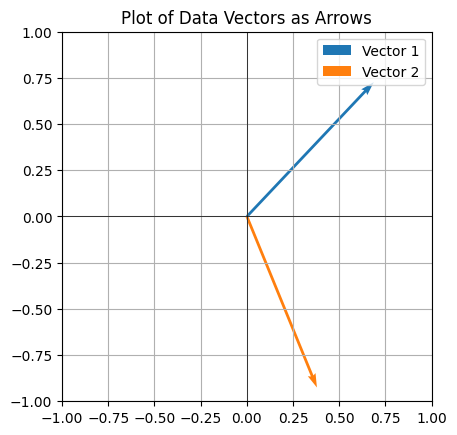

In [152]:
import matplotlib.pyplot as plt
# Plotting the data as arrows
plt.figure()
for i in range(D):
    plt.quiver(0, 0, data[:,selected_indices[:D]][0,i], data[:,selected_indices[:D]][1,i], angles='xy', scale_units='xy', scale=1, color=f'C{i}', label=f'Vector {i+1}')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title('Plot of Data Vectors as Arrows')
plt.show()

In [ ]:
# group lasso norm of beta inversese is less than group lasso norm of beta itself

In [144]:
group_lasso_norm(np.linalg.inv(data[:,selected_indices[:D]]))  # worse than 2

2.195550815756686

In [145]:
group_lasso_norm(np.linalg.inv(sym) @ np.linalg.inv(data[:,selected_indices[:D]]))

93.26910565904589

In [146]:
np.linalg.inv(sym)

array([[ 61.29244046, -26.21440691],
       [-26.21440691,  27.48196571]])

In [143]:
group_lasso_norm(np.linalg.inv(sym) @ data[:,selected_indices[:D]] @ np.linalg.inv(data[:,selected_indices[:D]]))

104.64266790471089

In [137]:
U = np.random.multivariate_normal(np.zeros(4), np.identity(4), 2)
sym = np.linalg.inv(U @ U.transpose()) / 20
print(group_lasso_norm(sym @ np.linalg.inv(data[:,selected_indices[:D]])))
print(group_lasso_norm(sym @ np.linalg.inv(data[:,selected_indices[:D]])))

0.1332976764209122
0.1332976764209122


In [138]:
sym

array([[0.02755798, 0.02628692],
       [0.02628692, 0.06146198]])

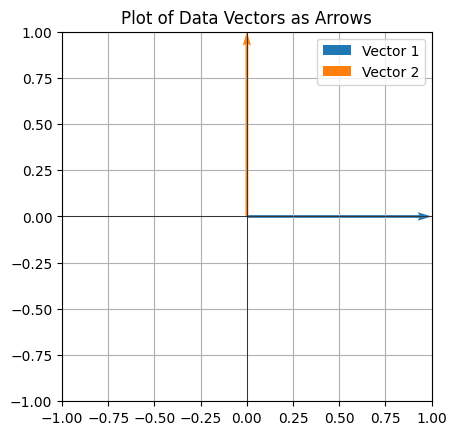

In [104]:
import matplotlib.pyplot as plt
# Plotting the data as arrows
plt.figure()
for i in range(D):
    plt.quiver(0, 0, X_prime[:,selected_indices[:D]][0,i], X_prime[:,selected_indices[:D]][1,i], angles='xy', scale_units='xy', scale=1, color=f'C{i}', label=f'Vector {i+1}')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title('Plot of Data Vectors as Arrows')
plt.show()

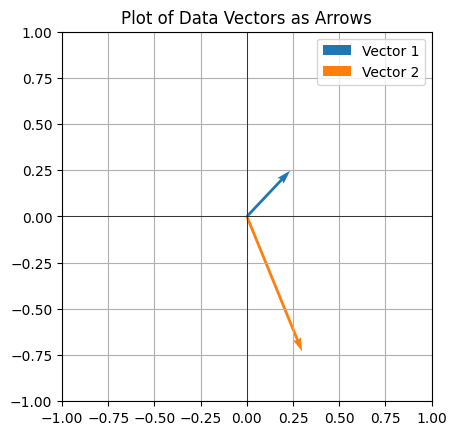

In [95]:
import matplotlib.pyplot as plt
# Plotting the data as arrows
plt.figure()

for i in range(D):
    plt.quiver(0, 0, beta[selected_indices][i,0], beta[selected_indices][i,1], angles='xy', scale_units='xy', scale=1, color=f'C{i}', label=f'Vector {i+1}')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title('Plot of Data Vectors as Arrows')
plt.show()

In [204]:
import matplotlib.pyplot as plt

def plot_arrows(data):
    
    # Plotting the data as arrows
    plt.figure()

    for i in range(data.shape[0]):
        plt.quiver(0, 0, data[0,i], data[1,i], angles='xy', scale_units='xy', scale=1, color=f'C{i}', label=f'Vector {i+1}')

    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.title('Plot of Data Vectors as Arrows')
    plt.show()

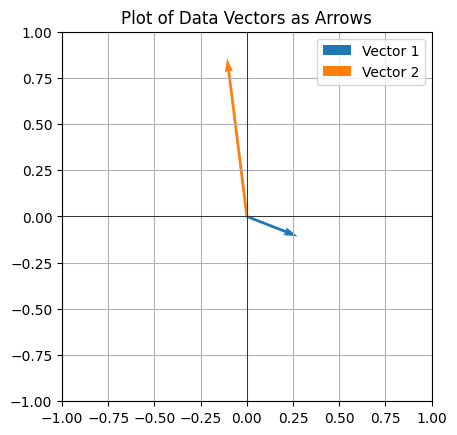

In [96]:
import matplotlib.pyplot as plt
# Plotting the data as arrows
plt.figure()

for i in range(D):
    plt.quiver(0, 0, betaprimeS[i,0], betaprimeS[i,1], angles='xy', scale_units='xy', scale=1, color=f'C{i}', label=f'Vector {i+1}')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title('Plot of Data Vectors as Arrows')
plt.show()

In [109]:
gamma = np.linalg.solve(X_prime[:,selected_indices[:D]], betaprimeS)


In [ ]:
# This one works strangely well - investigate?

# np.random.seed(0)
# # Y = np.identity(2)
# for i in range(2):
#     Y = np.random.multivariate_normal(np.zeros(2), np.identity(2), 2)
#     Y = np.einsum('d e, d -> d e', Y , np.linalg.norm(Y, axis = 1)**(-1))
#     X = data[:,selected_indices[:D]]
#     gamma = np.linalg.solve(X, Y)
#     delta = X @ gamma
#     print(group_lasso_norm(gamma), "practical solution")
#     print(group_lasso_norm(delta), "idealized solution")
    
#     # why does group_lasso_norm(delta) not equal 2?

# print(np.linalg.norm(X, axis = 0), 'Xs are normalized')
# print(np.linalg.norm(Y, axis = 0), 'Ys are normalized')


In [216]:
np.random.seed(0)
Y = np.identity(2)
for i in range(10):
#     Y = np.random.multivariate_normal(np.zeros(2), np.identity(2), 2)
    Y = np.einsum('d e, e -> d e', Y , np.linalg.norm(Y, axis = 0)**(-1))
    X = data[:,selected_indices[:D]]
    #gamma = np.linalg.solve(X, Y)
    gamma = np.linalg.inv(X) @ Y
    # delta = X @ gamma
#     delta = Y
    print(group_lasso_norm(gamma), "practical solution")
    print(group_lasso_norm(Y), "idealized solution")
#     print(np.linalg.norm(Y, axis = 1))
    # why does group_lasso_norm(delta) not equal 2?

2.195550815756686 practical solution
2.0 idealized solution
2.195550815756686 practical solution
2.0 idealized solution
2.195550815756686 practical solution
2.0 idealized solution
2.195550815756686 practical solution
2.0 idealized solution
2.195550815756686 practical solution
2.0 idealized solution
2.195550815756686 practical solution
2.0 idealized solution
2.195550815756686 practical solution
2.0 idealized solution
2.195550815756686 practical solution
2.0 idealized solution
2.195550815756686 practical solution
2.0 idealized solution
2.195550815756686 practical solution
2.0 idealized solution


In [219]:
np.random.seed(0)
Y = np.identity(2)
for i in range(10):
    X = np.random.multivariate_normal(np.zeros(2), np.identity(2), 2)
    X = np.einsum('d e, e -> d e', X , np.linalg.norm(X, axis = 0)**(-1))
    gamma = np.linalg.inv(X) @ Y
    print(group_lasso_norm(gamma), "practical solution")
    print(group_lasso_norm(Y), "idealized solution")

2.5788915702577704 practical solution
2.0 idealized solution
6.4169654678563095 practical solution
2.0 idealized solution
2.559431010052127 practical solution
2.0 idealized solution
3.1301520609146167 practical solution
2.0 idealized solution
2.2129424274434815 practical solution
2.0 idealized solution
4.009224598881277 practical solution
2.0 idealized solution
18.581348039188583 practical solution
2.0 idealized solution
13.282231380057315 practical solution
2.0 idealized solution
4.576642276449006 practical solution
2.0 idealized solution
34.098658103147216 practical solution
2.0 idealized solution


In [222]:
np.random.seed(0)
import scipy

# Y can be any unitary matrix
for i in range(10):
    Y = scipy.stats.unitary_group.rvs(2)
    X = np.random.multivariate_normal(np.zeros(2), np.identity(2), 2)
    X = np.einsum('d e, e -> d e', X , np.linalg.norm(X, axis = 0)**(-1))
    gamma = np.linalg.inv(X) @ Y
    print(group_lasso_norm(gamma), "practical solution")
    print(group_lasso_norm(Y), "idealized solution")

2.559431010052127 practical solution
1.9999999999999996 idealized solution
4.009224598881277 practical solution
2.0 idealized solution
4.576642276449006 practical solution
2.0 idealized solution
2.554280556312664 practical solution
1.9999999999999998 idealized solution
3.591775078574659 practical solution
2.0 idealized solution
2.089703038055616 practical solution
2.0 idealized solution
3.261022704688842 practical solution
2.0 idealized solution
4.953822070086682 practical solution
2.0 idealized solution
3.082263328338745 practical solution
2.0 idealized solution
2.1794438674382923 practical solution
1.9999999999999998 idealized solution


In [237]:
np.random.seed(2)
import scipy

# Y can be any unitary matrix
for i in range(1):
    Y = np.random.multivariate_normal(np.zeros(2), np.identity(2), 2)
    Y = np.einsum('d e, e -> d e', Y , np.linalg.norm(Y, axis = 0)**(-1))
    X = np.random.multivariate_normal(np.zeros(2), np.identity(2), 2)
    X = np.einsum('d e, e -> d e', X , np.linalg.norm(X, axis = 0)**(-1))
    gamma = np.linalg.inv(X) @ Y
    print(group_lasso_norm(gamma), "practical solution")
    print(group_lasso_norm(Y), "idealized solution")
    # dont worry about why idealized worse than practical sometimes for now

2.1975238694584913 practical solution
1.5952990063558015 idealized solution


In [ ]:
# why does the idealized solution not have norm 2

In [213]:
np.linalg.inv(X) @ Y

array([[0.84410734, 0.88381998],
       [0.98757844, 0.95776134]])

In [214]:
gamma

array([[0.84410734, 0.88381998],
       [0.98757844, 0.95776134]])

In [234]:
# its worst when Y are almost in the same direction, since we need a lot of one, and very little of the other.
# why would x_S beta_S ever be like that?
# they should be constrained to be orthogonal

array([[ 0.99854784,  0.22806936],
       [ 0.05387219, -0.97364489]])

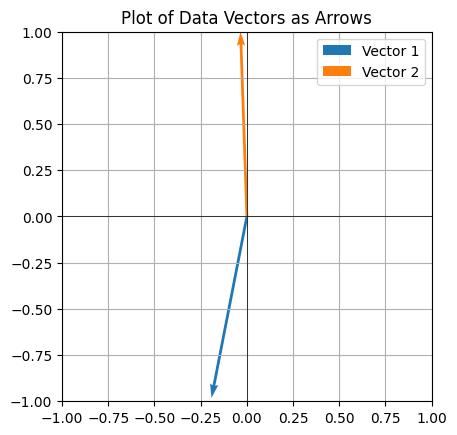

In [238]:
plot_arrows(Y)

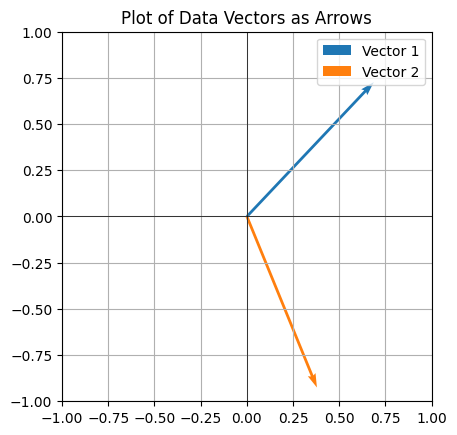

In [206]:
plot_arrows(X)

In [195]:
print(np.linalg.norm(X, axis = 0), 'Xs are normalized')
print(np.linalg.norm(Y, axis = 0), 'Ys are normalized')


[1. 1.] Xs are normalized
[1. 1.] Ys are normalized


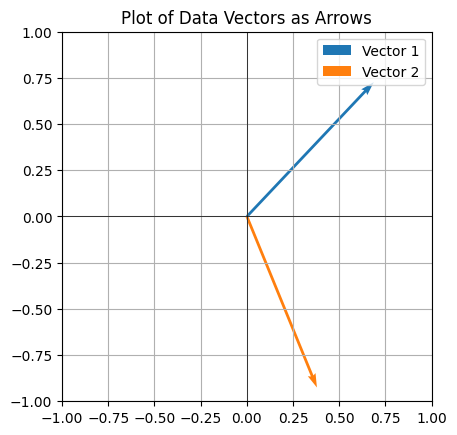

In [177]:
plot_arrows(X.transpose())

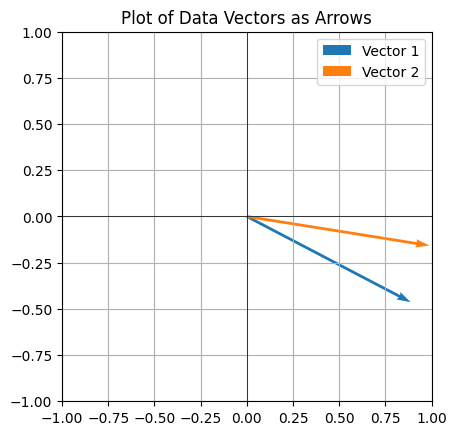

In [185]:
plot_arrows(Y)

In [182]:
np.linalg.norm(X, axis = 0)

array([1., 1.])

In [183]:
np.sqrt(2) / 2

0.7071067811865476

In [174]:
Y

array([[ 0.88601999, -0.46364704],
       [ 0.98754693, -0.15732467]])

In [168]:
np.linalg.norm(Y, axis = 1)

array([0.60785275, 0.84667873, 0.4320308 ])

In [113]:
beta[selected_indices[:D]]

array([[ 0.23368281,  0.24739413],
       [ 0.29909198, -0.73045285]])

In [111]:
betaprimeS

array([[ 0.27379782, -0.10690852],
       [-0.10690852,  0.85582758]])

In [85]:
np.linalg.norm(beta,axis = 1)[selected_indices[:D]].sum()

1.1296253988808347

In [29]:
np.delete(beta,selected_indices[:D], axis = 0)

array([[ 0.2093428 ,  0.20321492],
       [ 0.5773047 , -0.03899304]])

In [15]:
selected_indices

array([0, 1, 2, 3])

In [22]:
np.linalg.norm(beta, axis = 1)

array([0.3403109 , 0.7893145 , 0.29175454, 0.57862006])

In [23]:
data @ beta

array([[ 1.00000000e+00, -7.06613222e-17],
       [-2.89859725e-16,  1.00000000e+00]])